In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from PlotFunction import plot_decision_surface

In [38]:
param = "best"
paramSet = {
    "firstTry": {"eta0": 0.01, "n_iter_no_change": 3, "random_state": 5},
    "best": {"eta0": 0.1, "n_iter_no_change": 10, "random_state": 1},
}

In [39]:
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [41]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [42]:
ppn = Perceptron(
    eta0=paramSet[param]["eta0"],
    random_state=paramSet[param]["random_state"],
    verbose=1,
    n_iter_no_change=paramSet[param]["n_iter_no_change"],
)

In [43]:
# Training
ppn.fit(X_train_std, y_train)

-- Epoch 1
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 105, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 210, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 315, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 420, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 525, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 630, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 735, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 840, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 945, Avg. loss: 0.000000
Total training time: 0.00 s

Perceptron(eta0=0.1, n_iter_no_change=10, random_state=1, verbose=1)

In [44]:
# Prediction
y_pred = ppn.predict(X_test_std)


In [45]:
# Misclassification from the test samples
sumMiss = (y_test != y_pred).sum()

In [46]:
# Accuracy score from the test samples
accuracyScore = accuracy_score(y_test, y_pred)

In [47]:
print(f"Misclassified examples: {sumMiss}")
print(f"Accuracy score: {accuracyScore}")

Misclassified examples: 1
Accuracy score: 0.9777777777777777


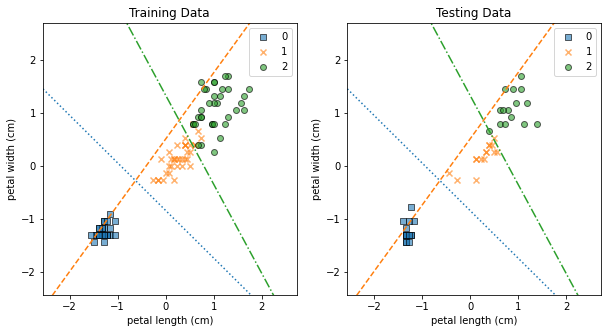

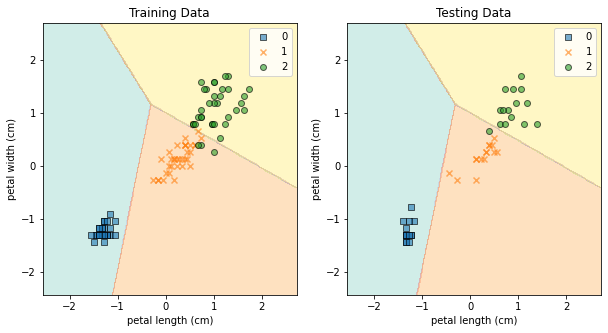

In [48]:
plot_decision_surface(X_train_std, X_test_std, y_train, y_test, ppn, filename="T1_Perceptron.png")